# Introducción 

Primero escribiremos las ecuaciones diferenciales que rigen el movimiento de un péndulo de longitud L
que se separa un ángulo $\theta$ de la vertical. Este parte con una velocidad inicial $v_0 = 0$. 

Por simplicidad, tomaremos coordenadas polares para hacer la descomposición de fuerzas y aplicar la 2da ley de Newton

$
\begin{equation}
\sum{\vec{F}} = m\vec{a}
\end{equation}
$

En la dirección $\hat{r}$

$T - mg\cos\theta = m(\ddot{l} - l\dot{\theta}^2)$

Mientras que en la dirección $\hat{tr}$ tenemos:

$- mg\sin\theta = m(l\ddot{\theta} +  2\dot{l}\dot{\theta})$

Quedemonos con la ecuación de la dirección transversal. En este caso $\dot{l} = 0 \implies \ddot{l} = 0$

$- mg\sin\theta = ml\ddot{\theta}$

Simpificando nos queda una ecuación diferencial de 2do orden, no lineal y homogénea

$\ddot{\theta} + \frac{g}{l}\sin\theta = 0$

Utilizamos RK45 como método de resolución y esperamos que el comportamiento sea


- Suavemente oscilatorio
- No perfectamente sinusoidal para ángulos grandes

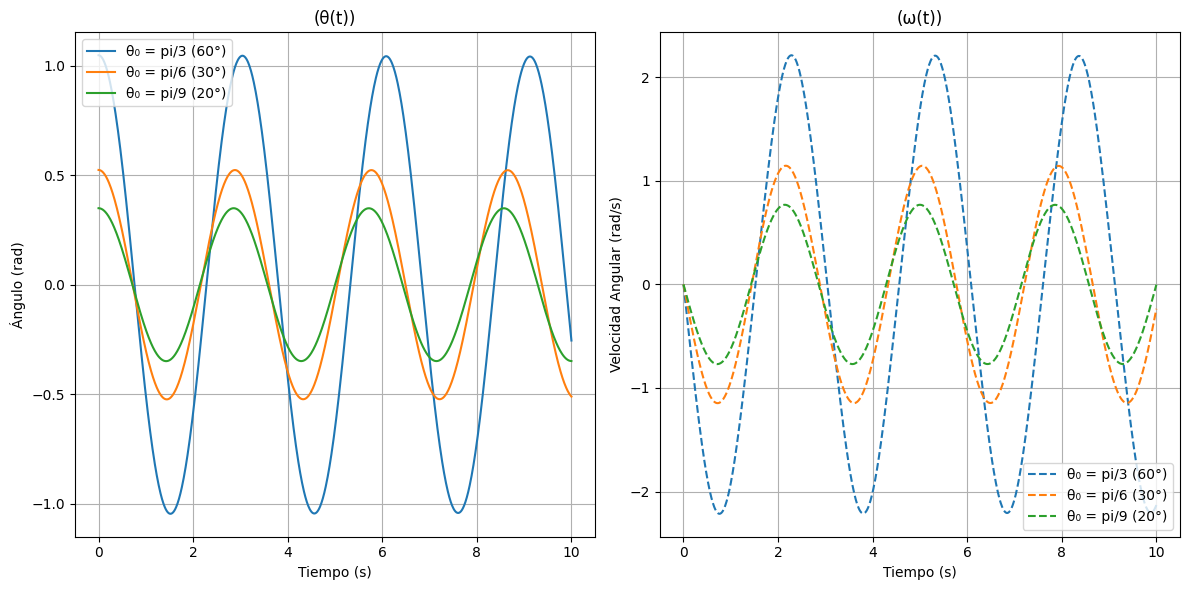

In [12]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

g = 9.81      
L = 2 
omega0 = 0.0  
t_max = 10  

initial_angles = [np.pi / 3, np.pi / 6, np.pi / 9]
angles = ['pi/3 (60°)', 'pi/6 (30°)', 'pi/9 (20°)']

def pendulo(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g / L) * np.sin(theta)
    return [dtheta_dt, domega_dt]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('(θ(t))')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('(ω(t))')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.grid(True)

for i, theta0 in enumerate(initial_angles):
    y0 = [theta0, omega0]
    t_eval = np.linspace(0, t_max, 1000)

    sol = solve_ivp(pendulo, [0, t_max], y0, method='RK45', t_eval=t_eval)

    plt.subplot(1, 2, 1) 
    plt.plot(sol.t, sol.y[0], label=f'θ₀ = {angles[i]}')

    plt.subplot(1, 2, 2)
    plt.plot(sol.t, sol.y[1], label=f'θ₀ = {angles[i]}', linestyle='--')

plt.subplot(1, 2, 1)
plt.legend()
plt.subplot(1, 2, 2)
plt.legend()

plt.tight_layout() 
plt.show()